#**KNN - Regression (Sklearn)**

###**Metrics**
- Minkowski distance:
  - It is a generalized form of both Euclidean and Manhattan distances.
    - Minkowski distance can take different forms depending on the value of p.
    - When p=2, Minkowski distance becomes Euclidean distance.
    - When p=1, Minkowski distance becomes Manhattan distance.

- 'euclidean': Equivalent to p=2 for Minkowski, calculates straight-line distance.
- 'manhattan': Equivalent to p=1 for Minkowski, sums absolute differences.
- 'chebyshev': Measures the maximum absolute difference between coordinates.
- 'mahalanobis': Accounts for feature correlation (based on covariance).
- 'cosine': Measures the cosine similarity between vectors (ignores magnitude).
- 'hamming': Measures the proportion of different positions in categorical data.

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [3]:
# Loading the California Housing dataset
dataset = fetch_california_housing()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df.shape

(20640, 8)

In [5]:
# Add the target column in dataset
df['Target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# # Selecting 'MedInc' (Median Income) and 'HouseAge' features
# df_selected = df[['MedInc', 'HouseAge']]
# df_selected.head()

In [7]:
X = df.iloc[:, [0, 1]].values  # We'll use only 2 features for visualization (MedInc, HouseAge)
y = df.iloc[:, -1].values # Target variable (House prices)
print(X[:5])
print(y[:5])

[[ 8.3252 41.    ]
 [ 8.3014 21.    ]
 [ 7.2574 52.    ]
 [ 5.6431 52.    ]
 [ 3.8462 52.    ]]
[4.526 3.585 3.521 3.413 3.422]


In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 2), (5160, 2), (15480,), (5160,))

In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting K-NN to the Training set
regressor = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred[:5])

[2.7176 2.524  2.1054 1.27   2.3408]


In [12]:
# Evaluating the performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.7445419546401674
R-squared (R2): 0.4367427573549024


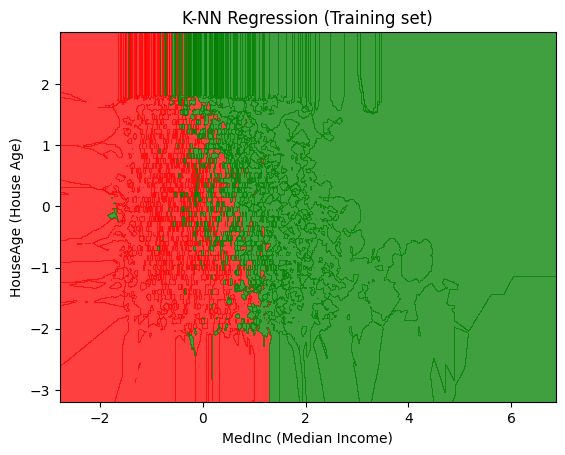

In [13]:
# Visualising the Training set results (Note: Visualization with only two features)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('K-NN Regression (Training set)')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('HouseAge (House Age)')
plt.show()

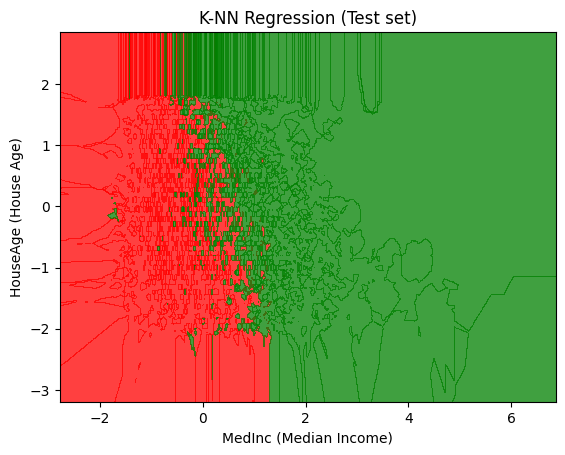

In [14]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('K-NN Regression (Test set)')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('HouseAge (House Age)')
plt.show()